# Hola Fernando!

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, parece que no, pero una buena introducción del proyecto permite generar un mejor desarrollo al mismo.
</div>

## Preparación

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from joblib import dump
from matplotlib import pyplot
import random
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data[data.index.duplicated(keep=False)]

,num_orders
datetime,


In [5]:
data.isna().sum()

num_orders    0
dtype: int64

In [6]:
data.sort_index(inplace=True)
print(data.index.is_monotonic)

True


In [7]:
data.loc['2018-03'].head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Se ha colocado la fecha y hora como índice utilizando el formato de fecha y hora para pandas. También se ordenaron los datos por fecha in hora ascendente y se ha confirmado que el orden sea monotono.

<div class="alert alert-block alert-warning">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>
    
~~Buen trabajo. Sin embargo, además de lo ya realizado, cubriría algunos aspectos como la revisión de los valores duplicados.~~
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Listo. He añadido una línea de código para verificar indices duplicados.
</div>


<div class="alert alert-block alert-success">
<strong>Comentario del revisor #2</strong> <a class="tocSkip"></a>
    
Buen trabajo.</div>


## Análisis

Vamos a pasar el conjunto de datos de un muestreo de órdenes cada 10 minutos a un muestreo de órdenes por cada hora. Esto para mejorar la resolución de nuestros gráficos de temporalidad y estacionalidad. 

In [8]:
data = data.resample('1H').sum()

### Temporalidad y estacionalidad

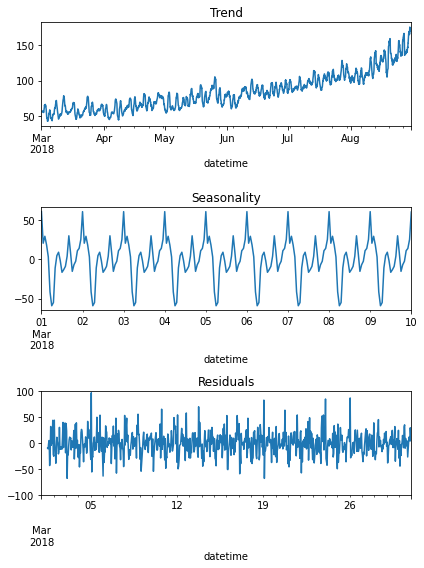

In [9]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(6, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.xlim([datetime.date(2018, 3, 1), datetime.date(2018, 8, 31)])

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, 10)])

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, 31)])
plt.ylim(-100,100)

plt.tight_layout()

- La tendecia de los datos con el tiempo es creciente, lo que vemos es que existen más viajes en promedio de manera mensual conforme avanzan los meses del año. 
- La estacionalidad de las órdenes tiene una frecuencia diaria, vemos que todos los días la cantidad de viajes aumenta con el tiempo desde la mañana a un máximo en las noches con una amplitud de 100 (50 a -50) viajes.
- Los residuales son el ruido asociado con la variación de los datos por hora y por día, me parece relevante que su amplitud llega a ser más alta que la observada en la estacionalidad debido a que día a día existe una variación considerable de viajes por hora que no se puede observar en la estacionalidad.

<div class="alert alert-block alert-success">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

Buen trabajo cubriendo el análisis de los componentes básicos de la serie de tiempo y concluyendo sobre los mismos.
</div>


### Análisis estocástico

In [10]:
data['mean'] = data['num_orders'].rolling(500).mean()
data['std'] = data['num_orders'].rolling(500).std()

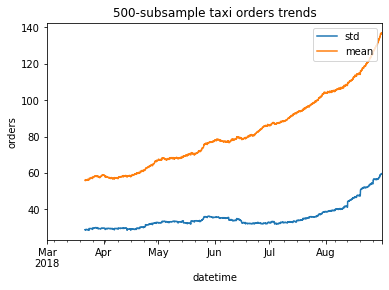

In [11]:
data['std'].plot()
data['mean'].plot()
plt.xlabel('datetime') 
plt.ylabel('orders') 

plt.title('500-subsample taxi orders trends')
plt.legend(loc='upper right')
plt.show()

- En el análisis estocástico podemos observar que la media y la desviación estándar del conjunto de datos va creciendo respecto a los meses del año. Esto es, hablamos de un proceso estocástico no estacionario. Es decir, su variación es aleatoria y cambia con el tiempo. 
- La media de la distribución de datos con muestra igual a 500 cambia más rápido que la desviación estándar en el mismo periodo de tiempo. Es decir, la cantidad de viajes aumenta rápidamente con el avance del año, y se vuelve más impredecible con el mismo avance.
- He utilizado un subgrupo de datos igual a 500 para calcular la media y la desviación para mejorar la definición del gráfico que muestra su variación con el tiempo.

<div class="alert alert-block alert-success">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

Buen trabajo Fernando.
</div>


## Formación

Vamos a utilizar una función que nos permita crear 3 columnas nuevas asociadas con el desglose del tiempo en mes, día y hora. Y, al mismo tiempo crear 5 columnas que nos muestren la media de 10 filas de datos en un desplazamiento de 5 espacios.

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

In [13]:
make_features(data, 5, 10)

In [14]:
data.head()

,num_orders,mean,std,month,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,NaN,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN,3,1,1,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN,3,1,2,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN,3,1,4,66.0,71.0,85.0,124.0,NaN,NaN


He seleccionado un retraso de los datos máximo igual a 5 para mantener la influencia de las columnas en los modelos en un rango razonable de procesamiento. Además he seleccionado un muestreo de 10 datos para el cálculo de la media móvil para mantener el tamaño de los conjuntos de prueba y entrenamiento en un tamaño suficiente para el procesamiento de datos.

<div class="alert alert-block alert-success">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

Buen trabajo estructurando los datos para los modelos que se van a desarollar.
</div>


## Entrenamiento y prueba de los modelos

Se procede a hacer la separación de los conjuntos de entrenamiento y de prueba, eliminando los datos ausentes del primer conjunto. Se ha seleccionado la función shuffle=False para que el conunto de entranamiento sea del 90% de los datos en orden de aparición. Y, en consecuencia el tamaño del conjunto de prueba sea del 10% del conjunto total en ordend e aparición.

In [15]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders','mean','std'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders','mean','std'], axis=1)
target_test = test['num_orders']

In [16]:
print(train.shape)
print(test.shape)

(3475, 12)
(442, 12)


Como resultado, nos hemos quedado con un conjunto de datos de entrenamiento con un total de 3475 datos y un conjunto de datos de prueba con 442 puntos de datos.

<div class="alert alert-block alert-success">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

Buen trabajo realizando el split de los datos teniendo en cuenta la naturaleza de estos mismos.
</div>

### Entrenamiento del modelo de regresión lineal

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
RECM = mean_squared_error(target_train, pred_train)**0.5
print('RECM:', 
      round(RECM))

RECM: 31


### Entrenamiento del modelo de árbol de decisión con hiperparámetros

In [18]:
RECM_list = []
for leaf in range(2, 12):
    for split in range(2, 12):
        for depth in range(1, 21):
            
            model = DecisionTreeRegressor(random_state=12345, max_depth=depth, 
                                          min_samples_leaf=leaf, 
                                          min_samples_split=split)
            model.fit(features_train, target_train)
            pred_train = model.predict(features_train)
            
            RECM = mean_squared_error(target_train, pred_train)**0.5
            RECM_list.append(mean_squared_error(target_train, pred_train)**0.5)
            
            if RECM == min(RECM_list):           
                best_RECM = RECM
                best_depth = depth
                best_leaf = leaf
                best_split = split
                    

print('RECM:', round(best_RECM), '(','depth:',best_depth,'; leaf:', best_leaf,'; split', best_split,')')

            

RECM: 9 ( depth: 20 ; leaf: 2 ; split 4 )


### Entrenamiento del modelo de bosque aleatorio con hiperparámetros

In [19]:
RECM_list = []
for est in range(10,110, 20):
    for depth in range(1, 22,2):
        for leaf in range(2, 12,2):
            for split in range(2, 12,2):

                model = RandomForestRegressor(random_state=54321, n_estimators=est, 
                                          max_depth=depth, min_samples_leaf=leaf, 
                                          min_samples_split=split)
                model.fit(features_train, target_train)
                pred_train = model.predict(features_train)
                
                RECM = mean_squared_error(target_train, pred_train)**0.5
                RECM_list.append(mean_squared_error(target_train, pred_train)**0.5)

                if RECM<=min(RECM_list):
                    best_RECM = RECM
                    best_est = est
                    best_depth = depth
                    best_leaf = leaf
                    best_split = split
                    
print('RECM:', round(best_RECM), '(','est:', best_est,'; depth:',best_depth,'; leaf:', best_leaf,'; split:', best_split,')')

RECM: 11 ( est: 90 ; depth: 21 ; leaf: 2 ; split: 4 )


### Evauación del mejor modelo con datos de prueba

In [20]:
model = RandomForestRegressor(random_state=12345, n_estimators = 90, 
                              max_depth=20, min_samples_leaf=2, 
                              min_samples_split=4)
model.fit(features_train, target_train)
pred_test = model.predict(features_test)

print('RECM para el conjunto de prueba:', 
      round(mean_squared_error(target_test, pred_test)**0.5))

RECM para el conjunto de prueba: 45


Se han entrenado 3 diferentes modelos para regresión con diferentes hiperparámetros. La métrica de evaluación requerida ha sido la raíz del error cuadrático medio. 

Observamos que el modelo de bosque aleatorio presenta un menor error con el aumento del parámetro de estimadores. Por lo tanto, utilizaremos este modelo para predecir el error en el conjunto de prueba. 

Como conclusión, podemos decir que el modelo de bosque aleatorio predice de mejor manera los viajes por hora próximos, basados en datos históricos del año 2018 entre los meses de maro y agosto. 

<div class="alert alert-block alert-danger">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

~~Buen trabajo realizando el despliegue de los modelos. Hay algunos aspectos que puedo comentarte para tratar de mejorarlo. En primer medida, podría ser útil usar la grilla de hiperparámetros en vez de los bucles. Esto será más óptimo y te permitirá explorar con la combinación de más hiperparámetros.~~
</div>


<div class="alert alert-block alert-danger">
<strong>Comentario del revisor</strong> <a class="tocSkip"></a>

# Comentario General

~~Has realizado un buen trabajo Fernando. He dejado algunos comentarios en rojo y amarillo para que puedas revisar y mejorar el proyecto.~~
</div>

<div class="alert alert-block alert-success">
<strong>Comentario del revisor #2</strong> <a class="tocSkip"></a>

# Comentario General #2

Buen trabajo Fernando!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
He utilizado un approach de grid search para encontrar los valores de hiperparámetro óptimos en cada caso.
</div>

# Lista de revisión

- [x]  Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  Los datos han sido descargados y preparados.
- [x]  Los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x]  La *RECM* para el conjunto de prueba no es más de 48